1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])


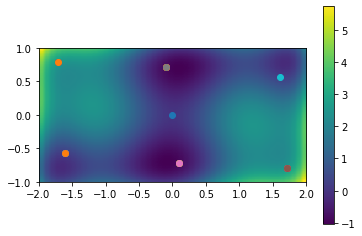

Text(0.5, 0.92, '2D minimization of a six-hump camelback function')

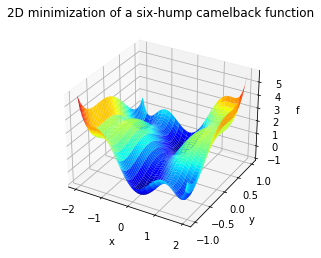

In [2]:
#define the function
def f(x):
    return (4-2.1*x[0]**2+(x[0]**4)/3)*x[0]**2+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
x_grid, y_grid = np.meshgrid(x, y)

minimum = optimize.minimize(f, x0=[0, 0]) #initial guess
print(minimum)

#plot the figure to understand where to guess other minimaplt.figure()
plt.imshow(f([x_grid, y_grid]), extent=[-2, 2, -1, 1])
plt.colorbar()

#explore the domain with "reasonable steps"
minima = []
for i in range(16):
    for j in range(8):
        minima.append(optimize.minimize(f, x0=[-2+0.25*i, -1.5+0.25*j]))

#plot the minima
for m in minima:
    plt.scatter(m.x[0], m.x[1])
    
plt.show()

#global picture: 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
function = ax.plot_surface(x_grid, y_grid, f([x_grid, y_grid]), rstride=1, cstride=2, cmap=plt.cm.jet, linewidth=0)

ax.set_zlabel('f')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('2D minimization of a six-hump camelback function')



2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

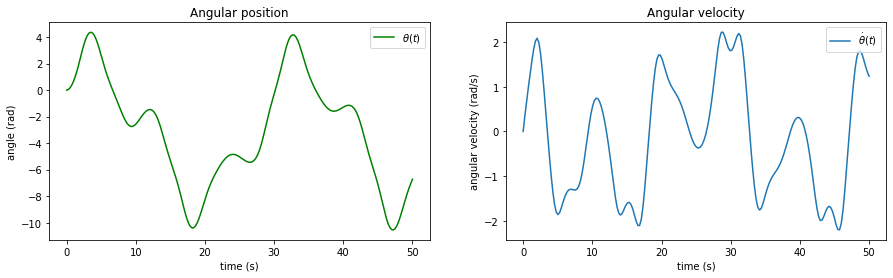

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#define the differential operator
def derivative(X, time, Q, d, Omega): 
    return(X[1], -(1/Q)*X[1]+np.sin(X[0])+d*np.cos(Omega*time))

#define the inizial conditions and the values for the constants
X_0 = (0, 0)
Q = 2.0
d = 1.5
Omega = 0.65

t = np.linspace(0, 50, 200)

X = odeint(derivative, X_0, t, args = (Q, d, Omega))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

ax1.plot(t, X[:, 0], label=r'$\theta(t)$', color ='g')
ax1.set_title('Angular position')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('angle (rad)')
ax1.legend(loc='best')

ax2.plot(t, X[:, 1], label=r'$\dot{\theta}(t)$')
ax2.set_title('Angular velocity')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('angular velocity (rad/s)')
plt.legend(loc='upper right')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

from the plots we see that the lynx and hare populations evolve with a period of 1/0.1 = 10 years


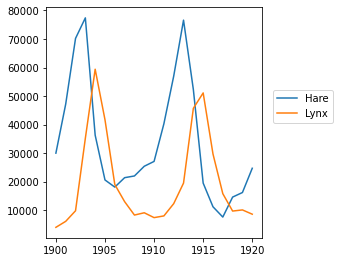

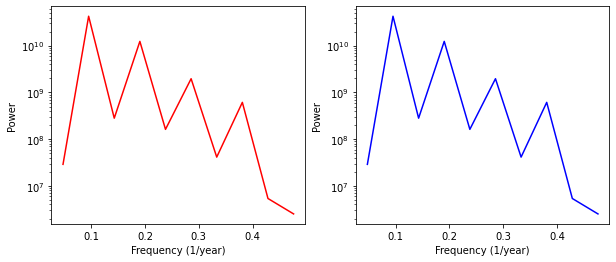

In [4]:
import pandas as pd
import datetime
from scipy import fftpack

data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T

from matplotlib import pyplot as plt
%matplotlib inline

plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes) 
plt.legend(('Hare', 'Lynx'), loc=(1.05, 0.5))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

lynx_fft = fftpack.fft(lynxes)
l_psd = np.abs(lynx_fft) ** 2
l_fftfreq = fftpack.fftfreq(len(l_psd))
i = l_fftfreq > 0
ax1.plot(l_fftfreq[i], l_psd[i], 'r')
ax1.set_xlabel('Frequency (1/year)')
ax1.set_ylabel('Power')
ax1.set_yscale('log')

hare_fft = fftpack.fft(hares)
h_psd = np.abs(lynx_fft) ** 2
h_fftfreq = fftpack.fftfreq(len(h_psd))
i = h_fftfreq > 0
ax2.plot(h_fftfreq[i], h_psd[i], 'b')
ax2.set_xlabel('Frequency (1/year)')
ax2.set_ylabel('Power')
ax2.set_yscale('log')

print("from the plots we see that the lynx and hare populations evolve with a period of 1/0.1 = 10 years")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

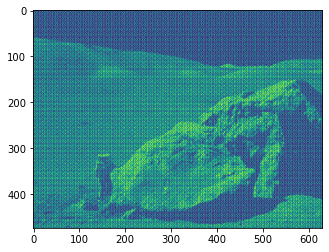

In [8]:
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#read the image
image = plt.imread("images/moonlanding.png")
plt.imshow(image)
fourier = scipy.fftpack.fft2(image)

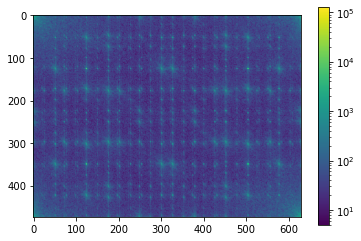

In [9]:
#get the frequency spectrum
power = np.abs(fourier)
plt.imshow(power, norm = LogNorm(vmin = 5))
plt.colorbar()

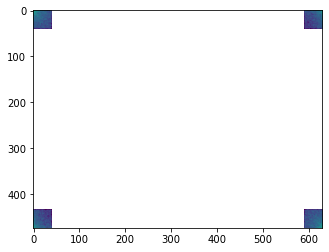

In [20]:
#had problems with selecting all the peaks... I'll just take the corners, where it seems to be most of the signal
f_2 = fourier.copy()
f_2[40:r - 40] = 0
f_2[:, 40:c - 40] = 0

plt.imshow(np.abs(f_2), norm=LogNorm(vmin=10))

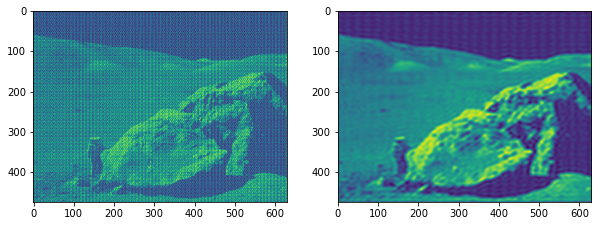

In [21]:
#inverse Fourier and compare the plot
filtered_image = fftpack.ifft2(f_2).real
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(image)
axes[1].imshow(filtered_image)